In [3]:
import torch
ckpt = torch.load('/home/wlzhang/Downloads/yolov5-6.1_official/runs/train/exp_origin/weights/best.pt', map_location='cuda') 
# print(ckpt['epoch'])
# print(ckpt['best_fitness'])
# print(ckpt['training_results'])
# print(ckpt['optimizer'])
print(ckpt.keys())   #查看checkpoint有那些key


#model=yolov5()
#model.load_state_dict(ckpt['model'])



dict_keys(['epoch', 'best_fitness', 'model', 'ema', 'updates', 'optimizer', 'wandb_id', 'date'])


In [3]:
import torch
torch.cuda.empty_cache()

In [110]:
import os
root_dir='/home/wlzhang/Downloads/YOLO-v5-master_alter/map_out/detection-results'
# save_dir=
class_names = ['WBC', 'RBC', 'Platelets']
file_list=os.listdir(root_dir)
for i in file_list[0:] :
    txt_path=os.path.join(root_dir,i)
    # print(txt_path)
    f=open(txt_path)
    lines=[i.strip('\n') for i in f.readlines()]   #返回一个列表，没有去掉换行符号
    new_lines=[]
    for line in lines:
        new_line=line
        new_line=new_line.replace(new_line.split()[0], class_names[int(new_line.split(' ')[0])],1)
        new_line=new_line+'\n'
        new_lines.append(new_line)
        # print(new_line)
    w=open(txt_path,'w')
    w.writelines(new_lines)





ValueError: invalid literal for int() with base 10: 'RBC'

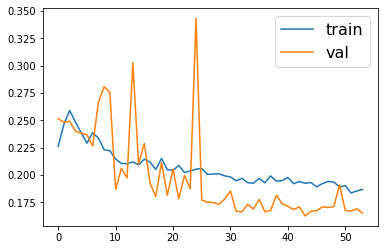

'\n正常的，验证集数据比训练集的数据量少，所以波动更大，这个是符合预期的。\n只要你的 train loss 和 valid loss 都在减小就可以了。而且你这个两个loss的diff挺小的，真真是极好的。\n'

In [12]:
import csv
import matplotlib.pyplot as plt
import pandas as pd

df1 = pd.read_csv('/home/wlzhang/Downloads/runs_Oct27_12-04-34_beantech-deskto_train.csv')  # csv文件所在路径
step1 = df1['Step'].values.tolist()
loss1 = df1['Value'].values.tolist()

df2 = pd.read_csv('/home/wlzhang/Downloads/runs_Oct27_12-04-34_beantech-desktop_val.csv')
step2 = df2['Step'].values.tolist()
loss2 = df2['Value'].values.tolist()

plt.plot(step1, loss1, label='train')
plt.plot(step2, loss2, label='val')
plt.legend(fontsize=16)  # 图注的大小
plt.show()

'''
正常的，验证集数据比训练集的数据量少，所以波动更大，这个是符合预期的。
只要你的 train loss 和 valid loss 都在减小就可以了。而且你这个两个loss的diff挺小的，真真是极好的。
'''
